In [1]:
# !conda install pandas-datareader

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?resource=download
df = pd.read_csv('data/card_transdata.csv')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


## data preprocessing and eda
- Perform the data exploration step (i.e. evaluate your data, # of observations, details about your data distributions, scales, missing data, column descriptions) Note: For image data you can still describe your data by the number of classes, # of images, plot example classes of the image, size of images, are sizes uniform? Do they need to be cropped? normalized? etc.

No null data

In [4]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Slightly unbalanced fraud class, 8.7% fraud. I will likely use an evaluation metric that punishes false negatives more heavily, so emphasis on recall. The f2 score will likely be used.

In [ ]:
# !conda install pandas-datareader

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: - warning  libmamba Added empty dependency for problem type SOLVER_RULE_UPDATE


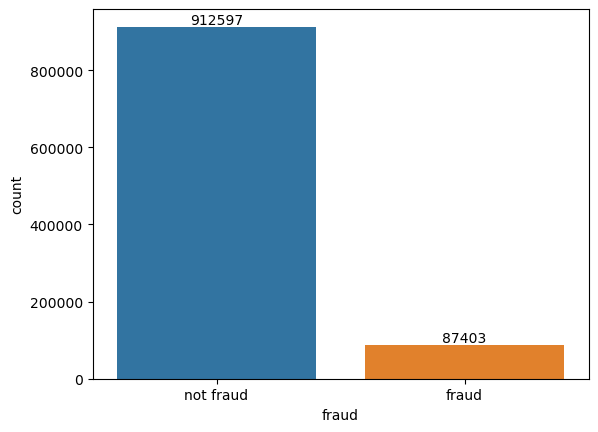

In [7]:
ax = sns.countplot(x='fraud', data=df)
plt.xticks(ticks=[0, 1], labels=['not fraud', 'fraud'])
ax.bar_label(ax.containers[0])
plt.show()

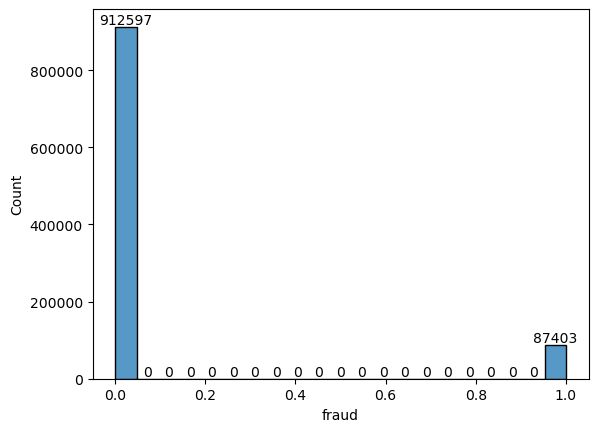

In [8]:
ax = sns.histplot(df['fraud'])
ax.bar_label(ax.containers[0])
plt.show()

In [10]:
sample = df.sample(10000)

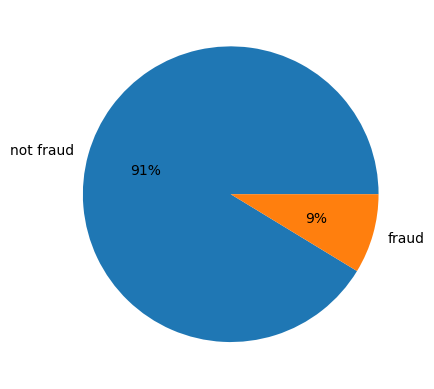

In [11]:
plt.pie(sample['fraud'].value_counts(), labels=['not fraud', 'fraud'], autopct='%.0f%%')
plt.show()

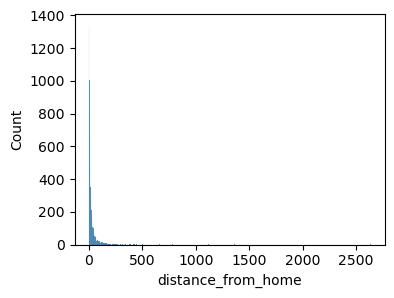

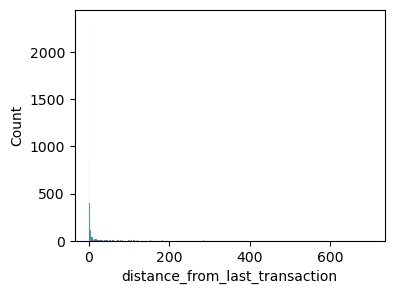

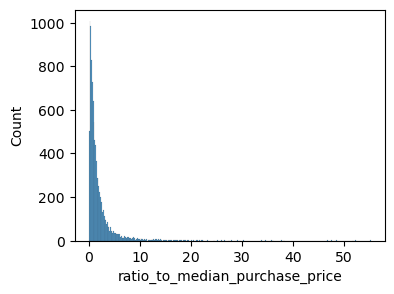

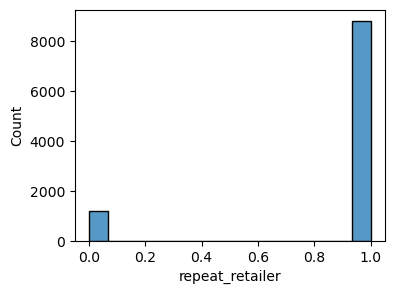

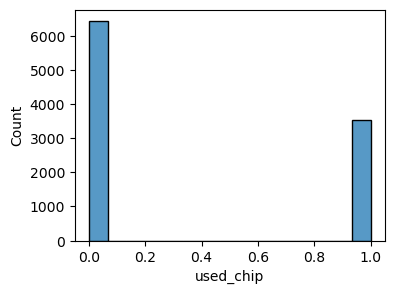

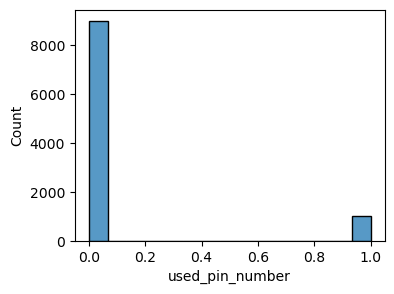

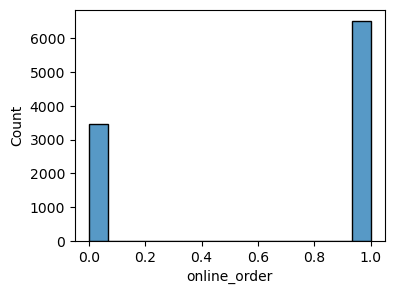

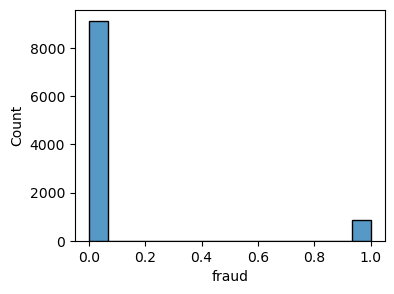

In [12]:
for col in sample.columns:
    plt.figure(figsize=(4, 3))
    sns.histplot(sample[col])
    plt.show()

<AxesSubplot:>

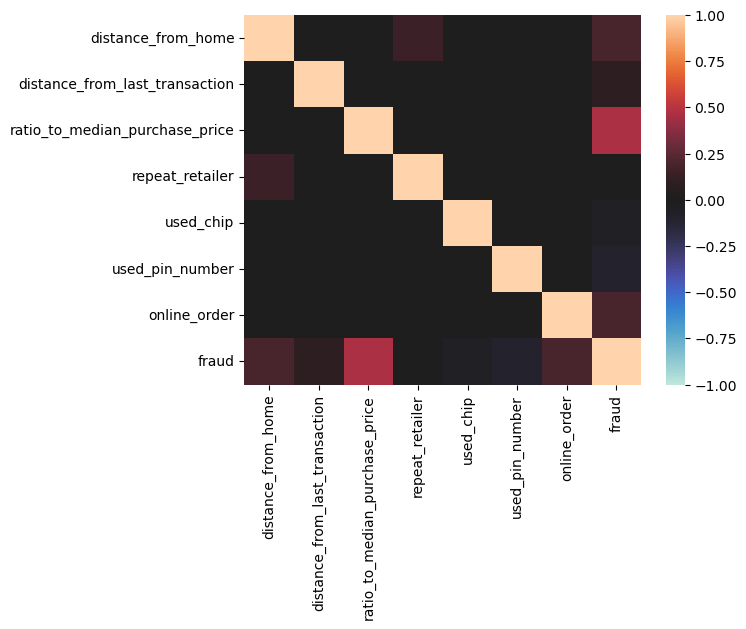

In [13]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0)

I will normalize the data with MinMaxScaler

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.005443,0.000026,0.007250,1.0,1.0,0.0,0.0,0.0
1,0.001018,0.000015,0.004816,1.0,0.0,0.0,0.0,0.0
2,0.000478,0.000068,0.001581,1.0,0.0,0.0,1.0,0.0
3,0.000211,0.000473,0.001338,1.0,1.0,0.0,1.0,0.0
4,0.004156,0.000048,0.008284,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,0.000207,0.000009,0.006058,1.0,1.0,0.0,0.0,0.0
999996,0.001869,0.000226,0.010358,1.0,1.0,0.0,0.0,0.0
999997,0.000274,0.000124,0.000798,1.0,1.0,0.0,1.0,0.0
999998,0.000400,0.000020,0.001760,1.0,0.0,0.0,1.0,0.0


In [16]:
sample = scaled_df.sample(1000)

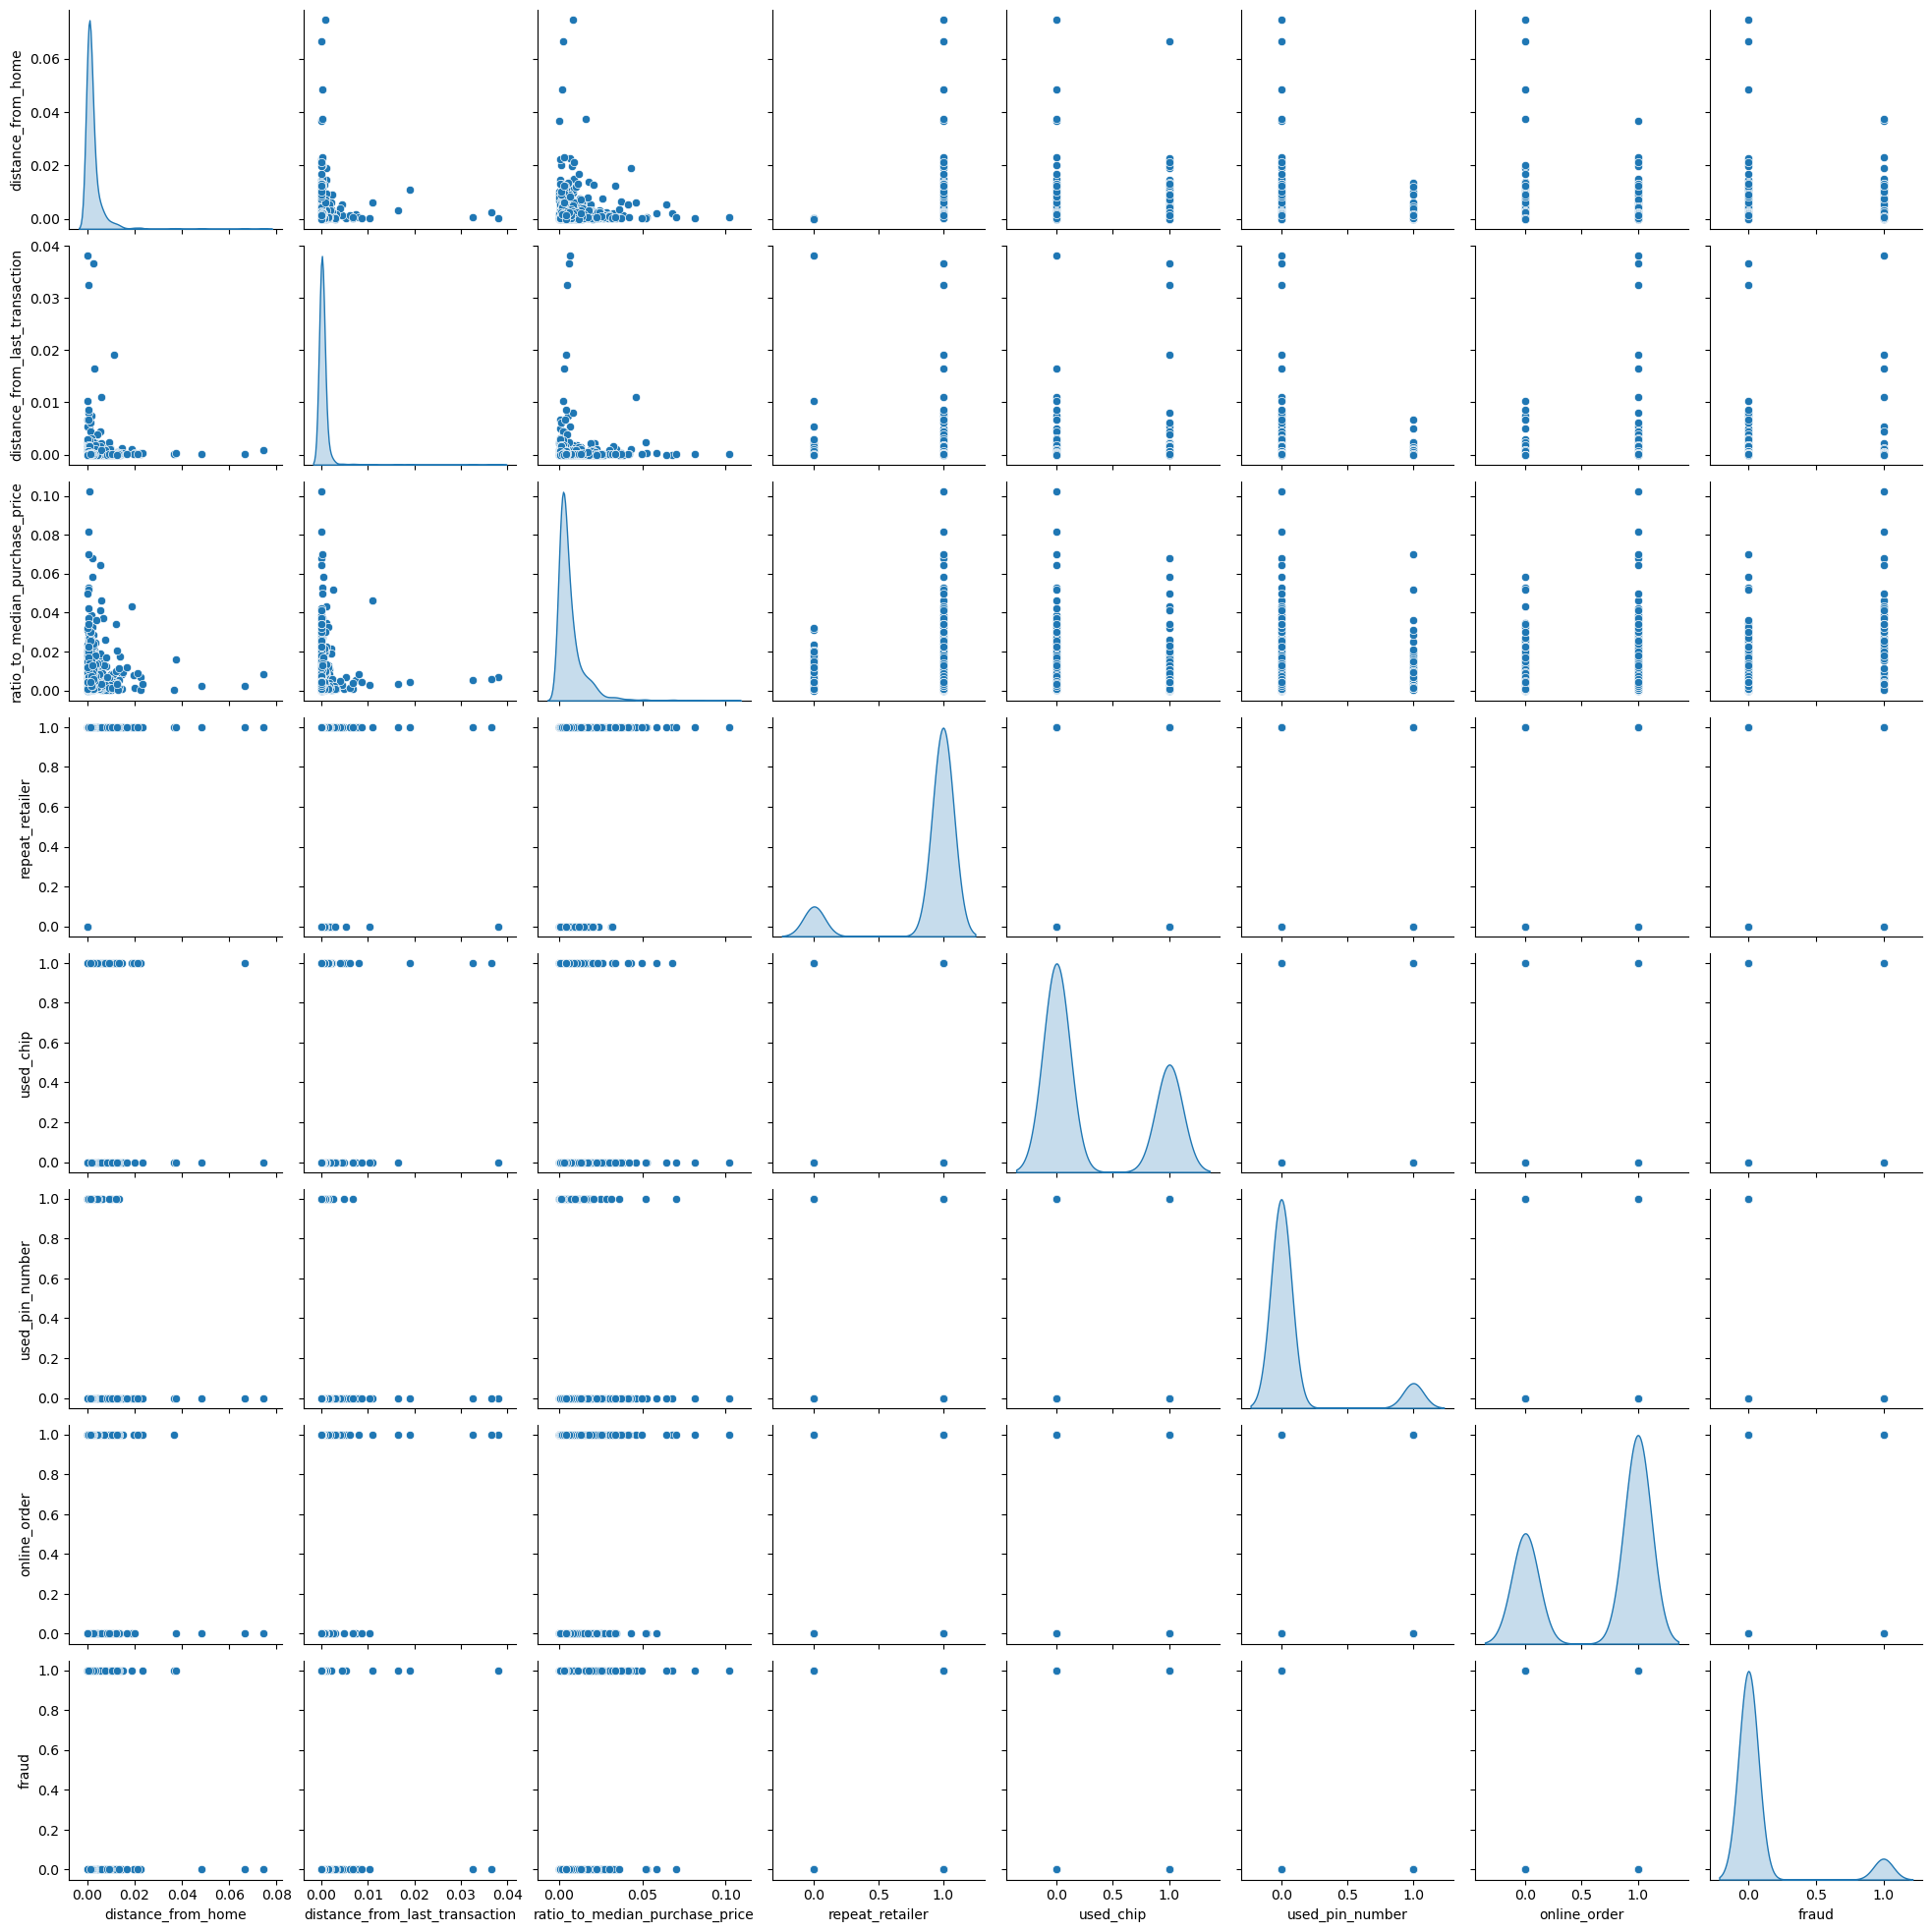

In [17]:
sns.pairplot(sample, diag_kind='kde')
plt.show()

### Skewed columns

For now, I will keep the three skewed columns since I believe they are good predictors for fraud. I have already performed min max scaler instead of something like log loss, since I want to keep the shape of the distribution.

In [28]:
scaled_df.skew()

distance_from_home                 20.239733
distance_from_last_transaction    125.921226
ratio_to_median_purchase_price      8.915015
repeat_retailer                    -2.361310
used_chip                           0.627134
used_pin_number                     2.655457
online_order                       -0.631517
fraud                               2.921824
dtype: float64

In [46]:
scaled_df['distance_from_home'] = np.log(scaled_df['distance_from_home'] + .0000001)
scaled_df['distance_from_home'] = np.log(scaled_df['distance_from_home'] + .0000001)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.005443,0.000026,0.007250,1.0,1.0,0.0,0.0,0.0
1,0.001018,0.000015,0.004816,1.0,0.0,0.0,0.0,0.0
2,0.000478,0.000068,0.001581,1.0,0.0,0.0,1.0,0.0
3,0.000211,0.000473,0.001338,1.0,1.0,0.0,1.0,0.0
4,0.004156,0.000048,0.008284,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,0.000207,0.000009,0.006058,1.0,1.0,0.0,0.0,0.0
999996,0.001869,0.000226,0.010358,1.0,1.0,0.0,0.0,0.0
999997,0.000274,0.000124,0.000798,1.0,1.0,0.0,1.0,0.0
999998,0.000400,0.000020,0.001760,1.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

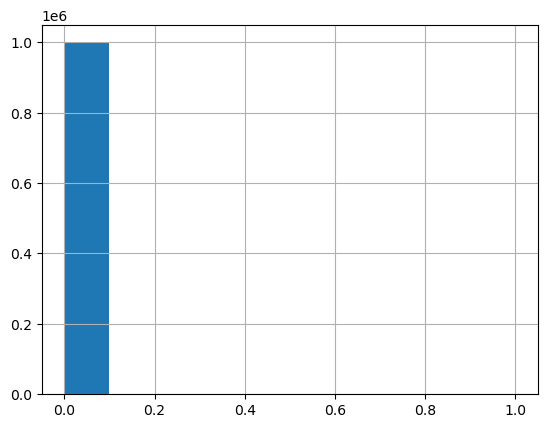

### Multicollinearity

In [ ]:
# statsmodels

## Splitting Data

Stratified splitting to keep original distribution of the class (fraud column)


In [18]:
X = scaled_df.drop('fraud', axis=1)
y = scaled_df['fraud']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

## Training First Model

We will try out ranodm forest classifier, and evaluate it with stratified k fold cv.


In [88]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [61]:
kf = StratifiedKFold(n_splits=10, shuffle=False)
rf = RandomForestClassifier(n_estimators=25, random_state=42)
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.99983655 0.99983655 1.         1.         0.9996731  0.99983655
 0.99983655 1.         0.99967315 0.99983657]
Average Cross Validation Recall score: 0.9998529011159887


In [65]:
rf.fit(X_train, y_train)

array([0., 0., 0., ..., 1., 0., 0.])

### Training metrics

In [103]:
y_pred = rf.predict(X_train)
test_accuracy = accuracy_score(y_train, y_pred)
print(classification_report(y_train, y_pred, target_names=['not fraud', 'fraud']))

              precision    recall  f1-score   support

   not fraud       1.00      1.00      1.00    638818
       fraud       1.00      1.00      1.00     61182

    accuracy                           1.00    700000
   macro avg       1.00      1.00      1.00    700000
weighted avg       1.00      1.00      1.00    700000



### Testing Metrics

It is odd that both metrics are so high. 

In [100]:
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=['not fraud', 'fraud']))

              precision    recall  f1-score   support

   not fraud       1.00      1.00      1.00    273779
       fraud       1.00      1.00      1.00     26221

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



Training Accuracy: 1.0000
Test Accuracy: 1.0000


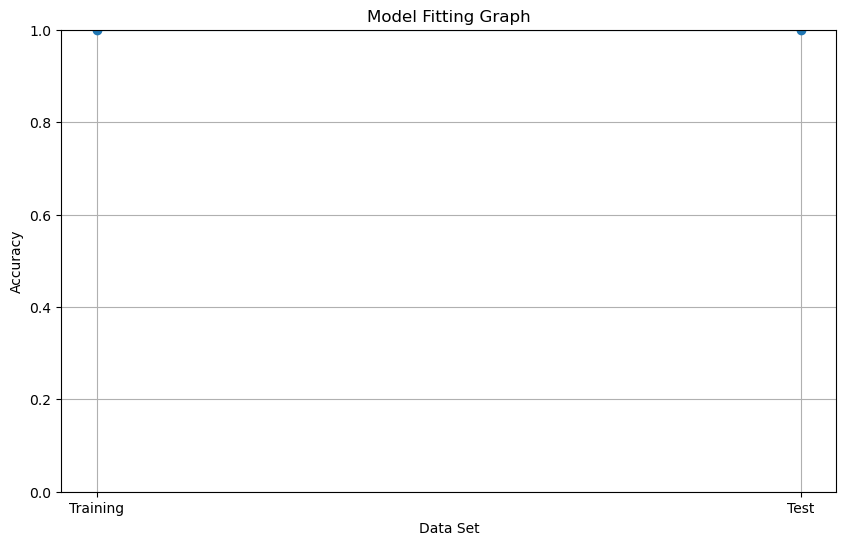

In [106]:
# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot the fitting graph
plt.figure(figsize=(10, 6))
plt.plot(['Training', 'Test'], [train_accuracy, test_accuracy], marker='o', linestyle='-')
plt.ylim(0, 1)
plt.title('Model Fitting Graph')
plt.xlabel('Data Set')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

### Other models to consider

1. Graph neural network
  - May be good for fraud rings, since they will be in clusters. 
2. Support vector machines.
  - The kernel trick may be good for outliers. 
3. Gradient boosting machine
  - They can be tuned for imbalanced datasets.
4. xg boost
  - Faster gbm

### Conclusion of first model

I believe there is overfitting going on, even though I did cross validation. I will try to fix the features or try oversampling. 

#### Hyperparameter tuning

Random search cv scored on recall

1. First try
    - Best parameters: {'random_state': 42, 'n_estimators': 75, 'max_depth': 12}
    - Best score: 0.9998692436560559


In [62]:
# params = {
#     'n_estimators': [10, 25, 50, 75],
#     'max_depth': [4, 6, 10, 12],
#     'random_state': [42]
# }

# grid_rf = RandomizedSearchCV(rf, param_distributions=params, cv=kf, n_jobs=-1,
#                              scoring='recall').fit(X_train, y_train)
# print('Best parameters:', grid_rf.best_params_)
# print('Best score:', grid_rf.best_score_)